# Propuesta para realizar integración en un periodo dado 

Las muestras obtenidas para una resolución de 2 seg tienen la siguiente forma

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

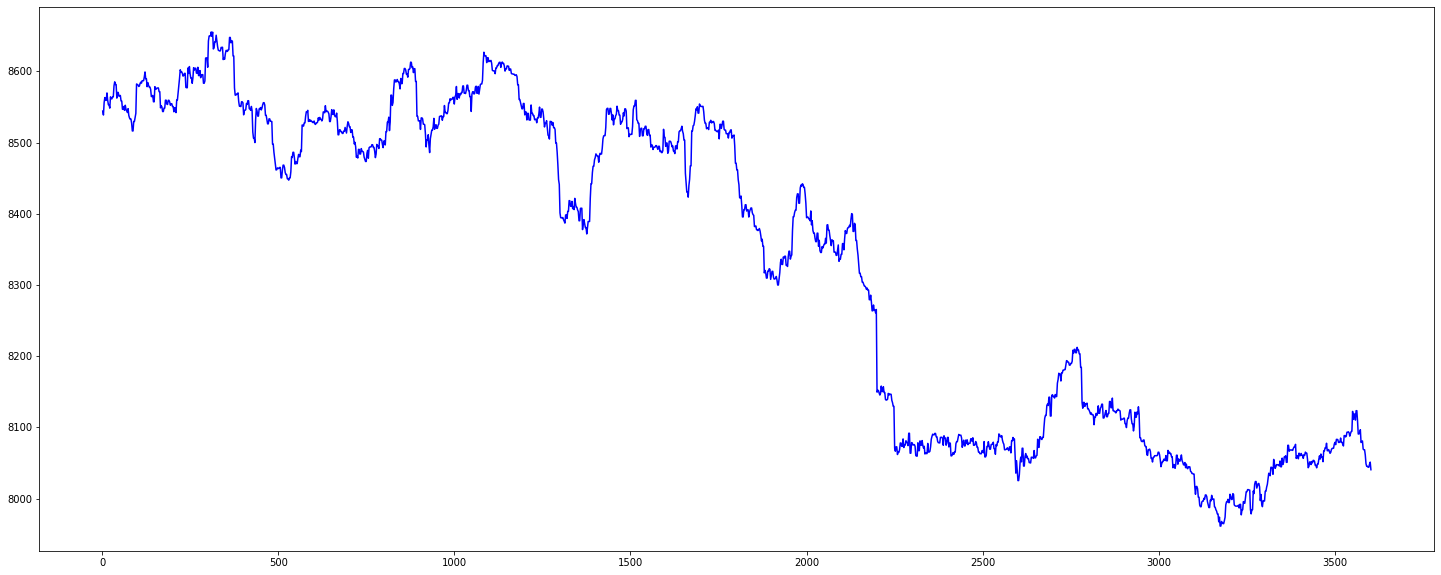

In [6]:
os.getcwd()
hora = pd.read_csv("Muestra_1h.csv")
plt.figure(figsize=(25,10))
plt.plot(hora.seg, hora.dem, 'b-')

Se agrega una columna adcional con los valores ordenados de mayor a menor ya que no nos interesa el orden en que se presentan las demandas. Lo único que interesa es el valor de cada paso de las muestras para calcular la energía y al final sumarlas

In [3]:
hora.head()

,seg,dem,orden
0,2,8544.239258,8655.427734
1,4,8538.705078,8655.117188
2,6,8556.333008,8650.758789
3,8,8563.195313,8649.875000
4,10,8559.343750,8649.875000


In [33]:
hora.tail()

,seg,dem,orden
1796,3594,8044.067383,7965.182617
1797,3596,8044.067383,7965.084961
1798,3598,8048.309570,7964.742188
1799,3600,8051.222168,7961.383789
1800,3602,8040.556152,7961.383789


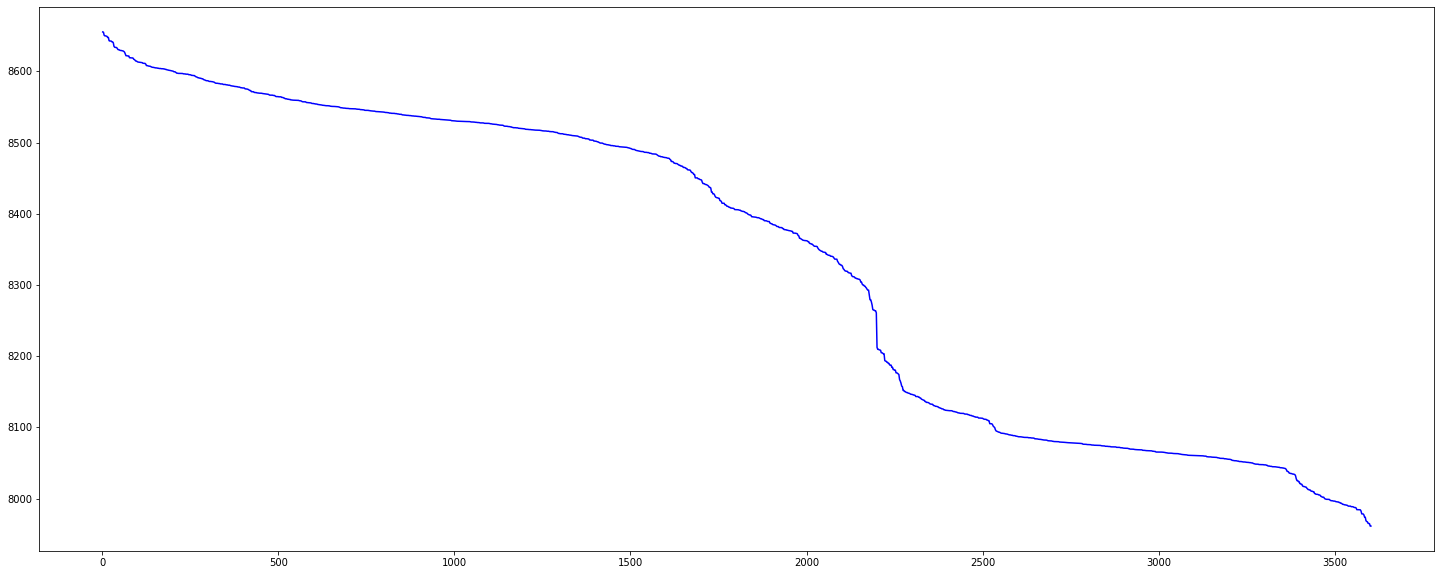

In [7]:
plt.figure(figsize=(25,10))
plt.plot(hora.seg, hora.orden, 'b-')

De esta manera se tiene un forma más fácil de aproximar con polinomios. Los cuales se podrían elegir en secciones cada 500 segundos, por ejemplo, para ajustar un polinomio de grado 7.

In [82]:
n_m = [0,500/2,1000/2,1500/2,2000/2,2500/2,3000/2,1800]
x = [0,500,1000,1500,2000,2500,3000,3602]
y = []
for i in range(len(x)):
    y.append(hora.orden[n_m[i]])
    
coef_aj = np.polyfit(x, y, len(x)-1)

In [83]:
neval = 100
xeval = np.linspace(min(x), max(x), neval)
yeval = np.polyval(coef_aj,xeval)

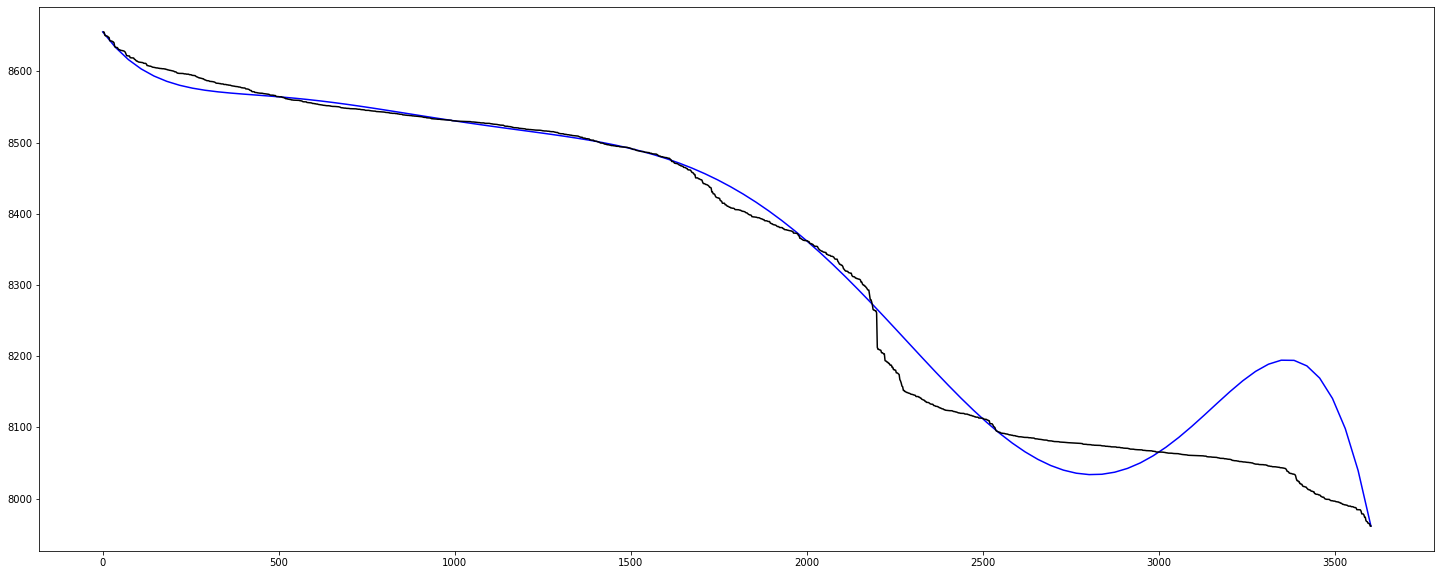

In [84]:
plt.figure(figsize=(25,10))
plt.plot(xeval, yeval, 'b-',
         hora.seg, hora.orden, 'k-')

Se podrían hacer más pruebas para ajustar mejor la curva, por ejemplo con 60 puntos.

In [78]:
n_m = []
x = []
k = 0
n_puntos = 60
for i in range(n_puntos):
    n_m.append(k)
    x.append(k*2)
    k = k+30

y = []
for i in range(len(x)):
    y.append(hora.orden[n_m[i]])
print(len(x),len(y))

60 60


In [79]:
coef_aj = np.polyfit(x, y, len(x)-1)

C:\Users\uard6\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
neval = 100
xeval = np.linspace(min(x), max(x), neval)
yeval = np.polyval(coef_aj,xeval)

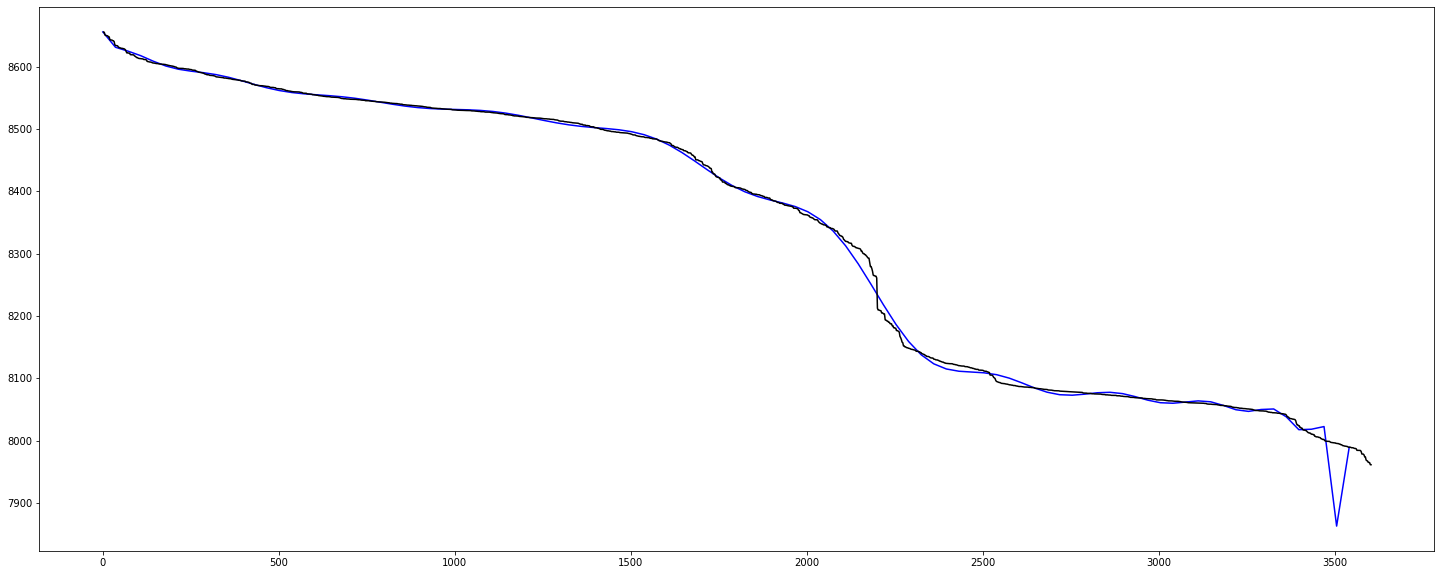

In [81]:
plt.figure(figsize=(25,10))
plt.plot(xeval, yeval, 'b-',
         hora.seg, hora.orden, 'k-')